In [685]:
import pandas as pd
%matplotlib inline
from sklearn import linear_model
import numpy as np
import seaborn as sns

In [686]:
# загрузка данных
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [687]:
# посмотрим на данные
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [688]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [689]:
df_train.shape

(891, 12)

In [690]:
# посомтрим на пропуски
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


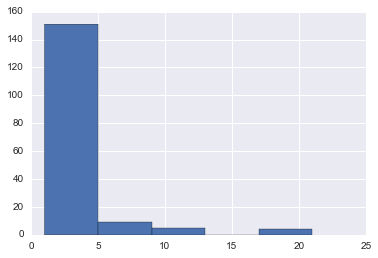

In [691]:
df_test['Fare'].value_counts().hist(bins = 5)

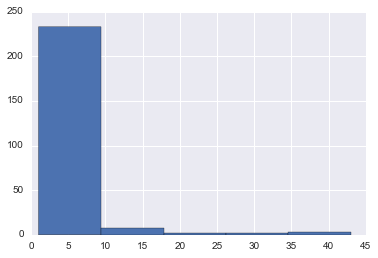

In [692]:
df_train['Fare'].value_counts().hist(bins = 5)

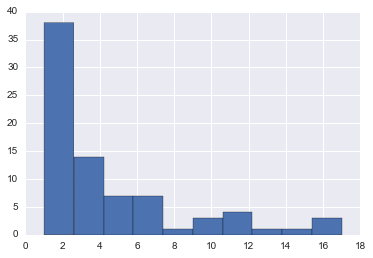

In [693]:
df_test['Age'].value_counts().hist()

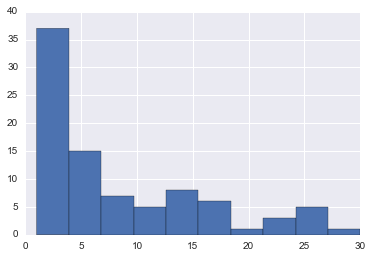

In [694]:
df_train['Age'].value_counts().hist()

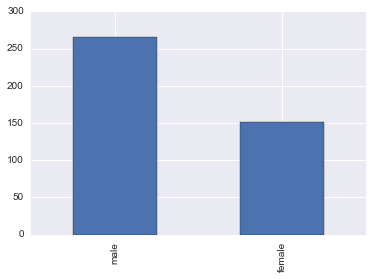

In [695]:
df_test['Sex'].value_counts().plot(kind='bar')

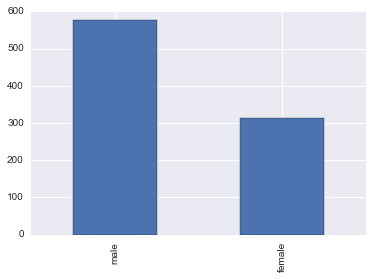

In [696]:
df_train['Sex'].value_counts().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11769efd0>]], dtype=object)

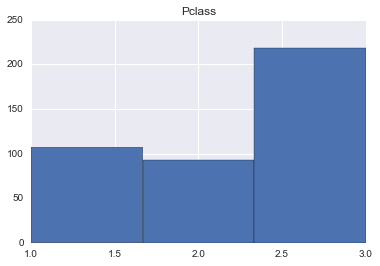

In [697]:
df_test.hist(column='Pclass', bins=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1168e15f8>]], dtype=object)

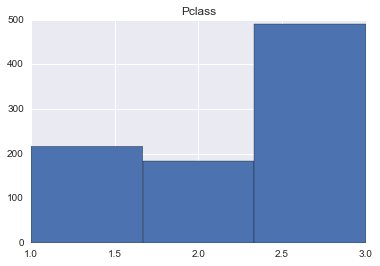

In [698]:
df_train.hist(column='Pclass', bins=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11694c0f0>]], dtype=object)

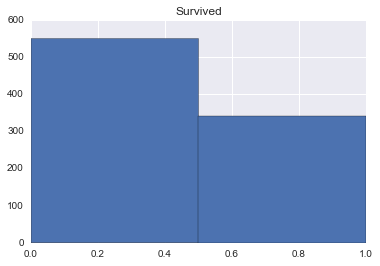

In [699]:
df_train.hist(column='Survived', bins=2)

In [700]:
# выбросим 2 записи, у которых нет Embarked
df_train = df_train[df_train['Embarked'].notnull()]

In [701]:
# объединим тестовую выборку и трейн, чтобы вместе предобработать
cnt = len(df_train)
df_y = df_train['Survived']
df_train.drop('Survived', axis=1, inplace=True)

df_train = pd.concat([df_train, df_test], axis=0)

In [702]:
# есть идея проверить и создать интересную фичу из имени и фамилии - там есть, как я понимаю, девечьи имена женщин, 
# поставим 1 если такое есть имя в скобочках и 0 если нет, а если пол мужской поставим -1
df_train['Married'] = np.where((df_train['Name'].str.contains('\\(')) & (df_train['Name'].str.contains('\\)')), 1, 0)
df_train['Married'] = np.where(df_train['Sex'] == 'male', -1, df_train['Married'])

In [703]:
# есть предположение, что билеты с буквами отличаются от простых числовых
df_train['Ticket_with_digits'] = np.where(df_train['Ticket'].str.isdigit(), 1, 0)

In [704]:
# отметим там, где есть
df_train['Cabin_exist'] = np.where(df_train['Cabin'].notnull(), 1, 0)

In [705]:
# удалим из рассмотрения столбец с id пассажира, так как он не отражает связи с какими либо данными - просто порядковый номер
# удалим также обработанные столбцы ранее
df_train.drop('PassengerId', axis=1, inplace = True)
df_train.drop('Ticket', axis=1, inplace = True)
df_train.drop('Cabin', axis=1, inplace = True)
df_train.drop('Name', axis=1, inplace = True)

In [706]:
# разберемся с категориальными признаками
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])

In [707]:
df_train.head()

,Pclass,Age,SibSp,Parch,Fare,Married,Ticket_with_digits,Cabin_exist,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,-1,0,0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1,0,1,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,0,0,0,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1,1,1,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,-1,1,0,0.0,1.0,0.0,0.0,1.0


In [708]:
# проверим возраст на адекватность
df_train[(df_train.Age < 1) | (df_train.Age > 100)]

,Pclass,Age,SibSp,Parch,Fare,Married,Ticket_with_digits,Cabin_exist,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
78,2,0.83,0,2,29.0000,-1,1,0,0.0,1.0,0.0,0.0,1.0
305,1,0.92,1,2,151.5500,-1,1,1,0.0,1.0,0.0,0.0,1.0
469,3,0.75,2,1,19.2583,0,1,0,1.0,0.0,1.0,0.0,0.0
644,3,0.75,2,1,19.2583,0,1,0,1.0,0.0,1.0,0.0,0.0
755,2,0.67,1,1,14.5000,-1,1,0,0.0,1.0,0.0,0.0,1.0
803,3,0.42,0,1,8.5167,-1,1,0,0.0,1.0,1.0,0.0,0.0
831,2,0.83,1,1,18.7500,-1,1,0,0.0,1.0,0.0,0.0,1.0
201,3,0.33,0,2,14.4000,-1,1,0,0.0,1.0,0.0,0.0,1.0
250,2,0.92,1,2,27.7500,0,0,0,1.0,0.0,0.0,0.0,1.0
281,3,0.75,1,1,13.7750,-1,0,0,0.0,1.0,0.0,0.0,1.0


In [709]:
# заменим все значения меньше нуля 1
df_train.loc[df_train.Age < 1, 'Age'] = 1

In [710]:
# заменим все значения меньше единицы 1 на медиану
df_train.loc[df_train.Fare < 1, 'Fare'] = df_train.Fare.mean()

In [711]:
# заменим все NaN средними
from sklearn.preprocessing import Imputer
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
df_train = fill_NaN.fit_transform(df_train)

In [712]:
# приведем все данные к одному виду 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train)
df_train_scale = scaler.transform(df_train)

In [713]:
# используем RandomForestClassifier с кросс валидацией
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=145)
from sklearn.ensemble import RandomForestClassifier
log = RandomForestClassifier(max_depth=4, n_estimators=6, max_features=2, random_state=104453)

scores = cross_val_score(log,
                         df_train_scale[0:cnt], df_y, groups=None,
                         scoring = make_scorer(accuracy_score),
                         cv = kfold)

In [714]:
# посмотрим усредненный score на кросс валидации
np.average(scores)

0.80203135910620205

In [715]:
log.fit(df_train_scale[0:cnt], df_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=1, oob_score=False, random_state=104453,
            verbose=0, warm_start=False)

In [716]:
predict = log.predict(df_train_scale[cnt:])

In [717]:
# сохранение результатов
with open('submission0.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(df_test['PassengerId'], predict):
        out.write('%s,%s\n' % (passenger, y))

### Мой средний score на кроссвалидации train 0.802, а на kaggle 0.775

разница между score я думаю в том, что мой лес хорошо подстроился под train, в тестовой выборке распределения классов и полов схоже с train, есть небольшая разница в возрасте и плате, возможно, это тоже дает небольшое расхождение в оценках